1. MCAR - Missing completely at Random => no relation within the data that is missing
2. MNAR - Missing data not at Random => some relationship between data that is missing [Systematic missing values]
3. MAR - Missing at Random => 

#Read: https://www.ncbi.nlm.nih.gov/books/NBK493614/

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].describe()

count    891.000000
mean       0.771044
std        0.420397
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: cabin_null, dtype: float64

In [6]:
df['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int32

In [7]:
df.groupby(['Survived'])['cabin_null'].describe().T

Survived,0,1
count,549.000000,342.000000
mean,0.876138,0.602339
std,0.329724,0.490132
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Ways to Handle missing values [categorical as well as continuous]

- Mean median mode replacement 
- Random sample imputation 
- Replace NaN with new feature 
- End of distribution imputation 
- Arbitrary imputation 
- Freq category imputation 

#### Mean Median Mode: 
- Just replace by mean, median or mode 
- if there are outliers, use median/mode and not mean
- When to apply? This has the assumption that data is MCAR

In [8]:
df1 = df[['Age','Fare','Survived']]
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [9]:
#checking percentage of missing values 
df1.isnull().mean() 

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

C:\Users\Jay\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jay\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


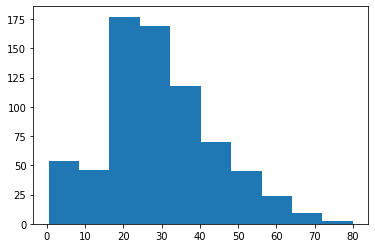

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(df1['Age'])
plt.show()

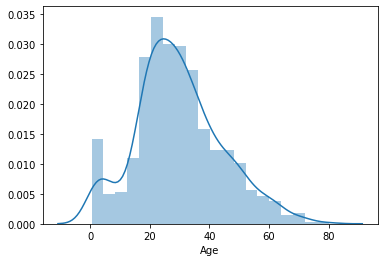

In [11]:
import seaborn as sns 

sns.distplot(df1['Age'])

In [12]:
#find median
med1 = df1['Age'].median()
med1

#fnc to replace nan
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

## from statistics import mean, median
impute_nan(df1,'Age',med1)

df1

C:\Users\Jay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0
...,...,...,...,...
886,27.0,13.0000,0,27.0
887,19.0,30.0000,1,19.0
888,NaN,23.4500,0,28.0
889,26.0,30.0000,1,26.0


In [13]:
# or do this!

# df1['Age'].isnull().sum()

# df1['Age'].fillna(df1['Age'].median, inplace=True)

# df1['Age'].isnull().sum()

In [14]:
df1['Age'].std()

14.526497332334044

In [15]:
df1['Age_median'].std()

13.019696550973194

In [16]:
#SD is less than before which is nice 

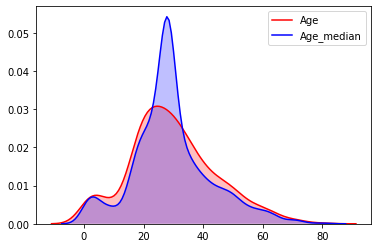

In [17]:
#kde - kernal density estimator 
p1=sns.kdeplot(df1['Age'], shade=True, color="r")
p1=sns.kdeplot(df1['Age_median'], shade=True, color="b")

After imputation, lot of values are towards the center [blue line]

Adv and DisAdv
- Fast and Easy to implement [robust to outliers]
- Distort the original data i.e. variance/sd will change 
- Impacts correlation 